# <center>L2 Computational Physics</center>
---

## Random Walks

This assignment will look at some properties of random walks.

In [2]:
import numpy
from matplotlib import pyplot as plt

To do our work we will implement a walker class. When initialised a list of possible steps is populated. In one dimension it is

[+s] , [-s] 

where s is the step size, it defaults to 1 but can be set as an argument in the constructor. In two dimensions the steps list contains

[ +s , 0 ] , [ -s , 0 ] ,  [ 0 , +s ] , [ 0 , -s ]

At each step the current position of the walker, saved in `self.pos`, is updated by adding one of the possible steps. The function `pickStep` chooses randomly one of the possible steps. Use this function to implement the `doSteps` function that performs `n` steps and returns a `(n+1) x ndim` array representing the trajectory of the walker, including the starting point. 

In [3]:

class walker:
    def __init__(self,x0,ndim=1, step_size=1.0):
        self.pos=x0
        self.ndim=ndim
        self.possibleSteps=[]
        for i in range(ndim):
            step=numpy.zeros(ndim)
            step[i]= - step_size
            self.possibleSteps.append(numpy.array(step,dtype='f'))
            step[i]= + step_size
            self.possibleSteps.append(step.copy())
        self.npossible=len(self.possibleSteps)
        
    def pickStep(self):
        istep = numpy.random.choice(range(self.npossible))
        return self.possibleSteps[istep]
        
    def doSteps(self,n):
        positions=numpy.ndarray((n+1,self.ndim),dtype='f')
        
        positions[0]=self.pos

        for i in range(n):
            self.newposition = self.pickStep()
            positions[i+1] = positions[i] + self.newposition
        
        
        return positions

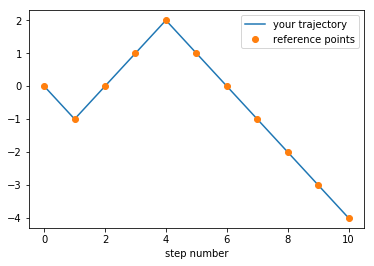

In [4]:
# this test is worth 2 marks
numpy.random.seed(1111)
w = walker(numpy.zeros(1))
pos_test = w.doSteps(10)
reference = [[ 0.], [-1.], [ 0.], [ 1.], [ 2.], [ 1.], [ 0.], [-1.], [-2.], [-3.], [-4.]]
assert len(pos_test)==11
# plots to help debugging
plt.plot(range(11),pos_test, label='your trajectory')
plt.plot(range(11),reference,'o', label='reference points')
plt.legend()
plt.xlabel('step number')
assert (pos_test == reference).all()

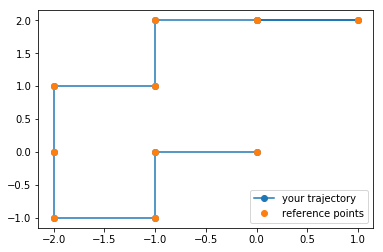

In [5]:
# this test is worth 5 marks
numpy.random.seed(1112)
w = walker(numpy.zeros(2), ndim=2)
pos_test = w.doSteps(10)
reference = numpy.array([[ 0.,  0.], [-1.,  0.], [-1., -1.], [-2., -1.], 
             [-2.,  0.], [-2.,  1.], [-1.,  1.], [-1.,  2.], 
             [ 0.,  2.], [ 1.,  2.], [ 0.,  2.]])
assert pos_test.shape == (11,2)
# plots to help debugging
plt.plot(pos_test[:,0], pos_test[:,1],'-o', label='your trajectory')
plt.plot(reference[:,0],reference[:,1],'o', label='reference points')
plt.legend()
assert (pos_test == reference).all()

This is a plot to visualise trajectories. Use it to convince yourself that you get different trajectories.

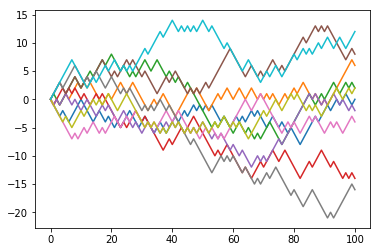

In [11]:
nsteps = 100
for i in range(10):
    w = walker(numpy.zeros(1))
    ys = w.doSteps(nsteps)
    plt.plot(range(nsteps+1),ys)

**Task 1**

Make a plot of average position and average squared position of 100 1D walkers using 1000 steps. Your plot needs a legend, title and labels. [5 marks]


Text(0.5,1,'Random Walkers')

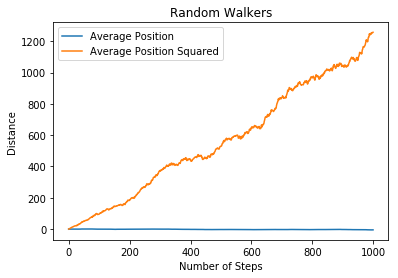

In [7]:
#Dont touch

nsteps = 1000
ndim = 1
nwalkers = 100

av = numpy.zeros((nwalkers,nsteps))
av2 = numpy.zeros((nwalkers,nsteps))


for i in range(nwalkers):
    w = walker(numpy.zeros(1))
    ys = (w.doSteps(nsteps))
    ys2 = (w.doSteps(nsteps))**2
    
    for j in range(nsteps):
        av[i][j] = ys[j]
        
    for j in range(nsteps):
        av2[i][j] = ys2[j]
    

average = numpy.mean(av, axis = 0)
average2 = numpy.mean(av2, axis = 0)


    
plt.plot(range(nsteps),average, label = 'Average Position')
plt.plot(range(nsteps),average2, label = 'Average Position Squared')
plt.legend()
    
plt.ylabel('Distance')
plt.xlabel('Number of Steps')
plt.title('Random Walkers')
    
    

**Task 2**

Make a plot to show that the average squared distance scaling is independent of the dimension in which the walker moves. Use 100 steps and 400 walkers and use $D=1,2,3,4$. The plot should have a title, legend and labels. [5 marks]


Text(0,0.5,'Distance Squared')

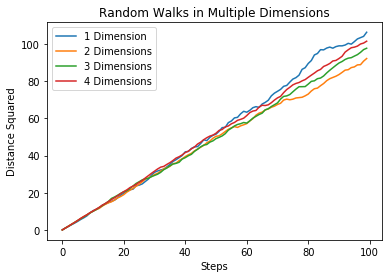

In [58]:
nsteps = 100
nwalkers = 400
dimensions = range(1,5)

avs1 = numpy.zeros((nwalkers,nsteps))
avs2 = numpy.zeros((nwalkers,nsteps))
avs3 = numpy.zeros((nwalkers,nsteps))
avs4 = numpy.zeros((nwalkers,nsteps))

w1 = walker(numpy.zeros(1),ndim=1)
w2 = walker(numpy.zeros(2),ndim=2)
w3 = walker(numpy.zeros(3),ndim=3)
w4 = walker(numpy.zeros(4),ndim=4)
    
for i in range(nwalkers):
    ysquared1 = (w1.doSteps(nsteps))**2
    for j in range(nsteps):
        avs1[i][j] = ysquared1[j]
averageSq1 = numpy.mean(avs1, axis = 0)    
plt.plot(range(nsteps),averageSq1, label = '1 Dimension')

for i in range(nwalkers):
    ysquared2 = (w2.doSteps(nsteps))**2
    for j in range(nsteps):
        avs2[i][j] = ysquared2[j][0] + ysquared2[j][1]
        
averageSq2 = numpy.mean(avs2, axis = 0)    
plt.plot(range(nsteps),averageSq2, label = '2 Dimensions')

for i in range(nwalkers):
    ysquared3 = (w3.doSteps(nsteps))**2
    for j in range(nsteps):
        avs3[i][j] = ysquared3[j][0] + ysquared3[j][1]+ ysquared3[j][2]
        
averageSq3 = numpy.mean(avs3, axis = 0)    
plt.plot(range(nsteps),averageSq3, label = '3 Dimensions')

for i in range(nwalkers):
    ysquared4 = (w4.doSteps(nsteps))**2
    for j in range(nsteps):
        avs4[i][j] = ysquared4[j][0] + ysquared4[j][1] + ysquared4[j][2] + ysquared4[j][3]
        
averageSq4 = numpy.mean(avs4, axis = 0)    
plt.plot(range(nsteps),averageSq4, label = '4 Dimensions')

plt.legend()
plt.title('Random Walks in Multiple Dimensions')
plt.xlabel('Steps')
plt.ylabel('Distance Squared')

## 2D walkers

Use 1000 walkers randomly distributed in the unit square (the positions are given in the array `rand_pos`) simulate the diffusion of particles with step size 0.05. Make a plot of the position of the walkers after 10, 100 and 500 steps. The plots should have labels and titles.

Tip: Use `plt.scatter` and consider using its `alpha` option to make you plot look nicer. [6 marks]


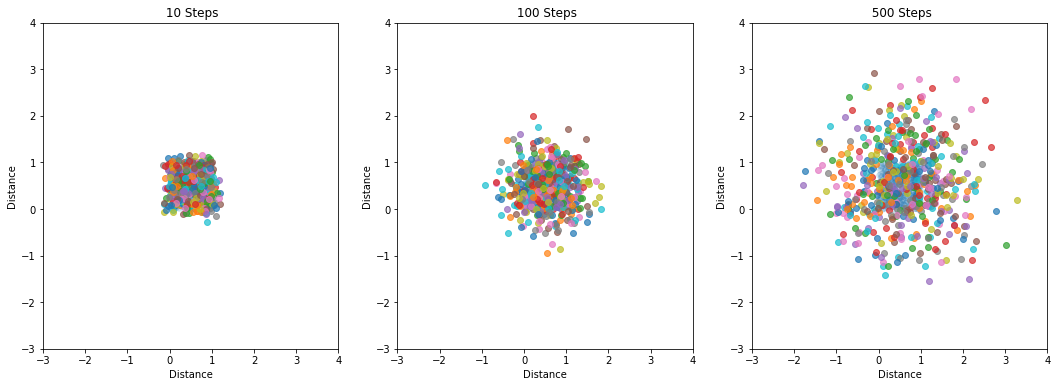

In [69]:
ndim=2
nwalkers=500
nsteps = 100

rand_pos = numpy.random.uniform(size=(nwalkers, ndim))
plt.figure(figsize=(18,6))
for i, nsteps in enumerate([10,100,500]):
    title = [10,100,500]
    plt.subplot(131+i)
    plt.xlim((-3, 4))
    plt.ylim((-3, 4))
    plt.title(" {} Steps".format(title[i]))
    plt.xlabel('Distance')
    plt.ylabel('Distance')
    plt.scatter(rand_pos[:,0], rand_pos[:,1], alpha=0.1)
    
    for j in range (nwalkers):
        w = walker(rand_pos[j],step_size = 0.05, ndim = 2)
        position = w.doSteps(nsteps)
        final = position[-1]
        plt.scatter(final[0],final[1], alpha = 0.7)